### Quick python Runtime_analysis_testing #66daysofdata

In [1]:
## This first day will be a bit all over the place but I'll be taking a look at some 
#Let's solve some anagrams (slow and fast)

In [2]:
def find_anagrams(lst):
    result = list()
    for words in lst:
        for word in words:
            if words != word and sorted(word) == sorted(words):
                if word not in result:
                    result.append(word)
                if words not in result:
                    result.append(words)
    return result

In [3]:
#Let's use these words
list_words = ['rat', 'rab', 'bat', 'tab', 'bagder', 'rad', 'dar', 'art', 'bart', 'bar']

In [4]:
%%timeit
find_anagrams(list_words)

16.6 µs ± 46.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [5]:
#Optimizing this since it does take longer
from collections import defaultdict
def find_anagrams_faster(lst): 
    result = []
    d = defaultdict(list) 
    for word in lst:
        d[tuple(sorted(word))].append(word) 
    for k, v in d.items():
        if len(v) > 1: result .extend(v)
    return result

In [7]:
%%timeit
find_anagrams_faster(list_words)

6.61 µs ± 23 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


#### There's a huge boost here! But how fast is it?

In [31]:
from timeit import Timer # Create and hold time values
import matplotlib.pyplot as plt # Creating graphs
import numpy as np # arrays are quicker than lists
#%matplotlib inline # Make graphs show up in the notebook itself

def how_fast(func, inputs, iterations= 100):
    '''
    INPUTS: func: the function we will be using
            inputs: Self explanitory (what inputs will we be putting through our function)
            iterations: How many times will we be running this
    OUTPUT: A 2 dim graphs 
            x-axis: Size of input
            y-axis: runtime          
    '''
    function_name = func.__name__
    print("TESTING:{0}".format(function_name))
    y = list()
    for i in inputs:
        t = Timer(stmt ='{0}({1})'.format(function_name,i),
                setup = 'from __main__ import {0}'.format(function_name))
        y.append(t.timeit(iterations)/iterations)
    x= [len(i) for i in inputs]
    plt.plot(x,y,label = function_name, marker = '.')
    plt.legend()

In [25]:
# Let's create a wordlist with several words to find anagrams
import urllib #Fetch files from online
with urllib.request.urlopen('http://www.mieliestronk.com/corncob_lowercase.txt') as f:
    text = f.read().decode()
    words = [word.strip() for word in text.split('\n')] # All words in the dictionary
wordlists= []
for n in range(10,200,10):
    wordlists.append(words[:n])

TESTING:find_anagrams
TESTING:find_anagrams_faster


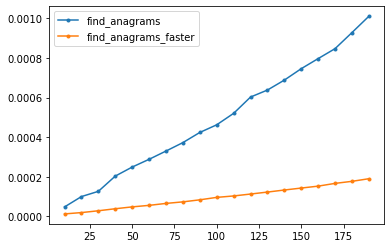

In [32]:
how_fast(find_anagrams,wordlists, iterations = 20)
how_fast(find_anagrams_faster,wordlists,iterations = 20)